<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span><ul class="toc-item"><li><span><a href="#Copying-images-to-training,-validation,-and-test-directories" data-toc-modified-id="Copying-images-to-training,-validation,-and-test-directories-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Copying images to training, validation, and test directories</a></span></li></ul></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building the network</a></span><ul class="toc-item"><li><span><a href="#Configuring-the-model-for-training" data-toc-modified-id="Configuring-the-model-for-training-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Configuring the model for training</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Using-ImageDataGenerator-to-read-images-from-directories" data-toc-modified-id="Using-ImageDataGenerator-to-read-images-from-directories-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using <code>ImageDataGenerator</code> to read images from directories</a></span></li><li><span><a href="#Fitting-the-model-using-a-batch-generator" data-toc-modified-id="Fitting-the-model-using-a-batch-generator-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fitting the model using a batch generator</a></span></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Saving the model</a></span></li></ul></li><li><span><a href="#Displaying-curves-of-loss-and-accuracy-during-training" data-toc-modified-id="Displaying-curves-of-loss-and-accuracy-during-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Displaying curves of loss and accuracy during training</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Setting-up-a-data-augmentation-configuration-via-ImageDataGenerator" data-toc-modified-id="Setting-up-a-data-augmentation-configuration-via-ImageDataGenerator-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Setting up a data augmentation configuration via <code>ImageDataGenerator</code></a></span></li><li><span><a href="#Displaying-some-randomly-augmented-training-images" data-toc-modified-id="Displaying-some-randomly-augmented-training-images-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Displaying some randomly augmented training images</a></span></li><li><span><a href="#Defining-a-new-convnet-that-includes-dropout" data-toc-modified-id="Defining-a-new-convnet-that-includes-dropout-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Defining a new convnet that includes dropout</a></span></li><li><span><a href="#Training-the-convnet-using-data-augmentation-generators" data-toc-modified-id="Training-the-convnet-using-data-augmentation-generators-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Training the convnet using data-augmentation generators</a></span></li><li><span><a href="#Saving-the-new-model" data-toc-modified-id="Saving-the-new-model-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Saving the new model</a></span></li><li><span><a href="#Plot-the-new-results" data-toc-modified-id="Plot-the-new-results-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Plot the new results</a></span></li></ul></li><li><span><a href="#Using-a-pretrained-convnet" data-toc-modified-id="Using-a-pretrained-convnet-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using a pretrained convnet</a></span><ul class="toc-item"><li><span><a href="#Insatiating-the-VGG16-convolutional-base" data-toc-modified-id="Insatiating-the-VGG16-convolutional-base-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Insatiating the VGG16 convolutional base</a></span></li><li><span><a href="#Technique-1:-Fast-Feature-Extraction-without-data-augmentation" data-toc-modified-id="Technique-1:-Fast-Feature-Extraction-without-data-augmentation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Technique 1: Fast Feature Extraction without data augmentation</a></span></li><li><span><a href="#Technique-2:-Feature-Extraction-with-Data-Augmentation" data-toc-modified-id="Technique-2:-Feature-Extraction-with-Data-Augmentation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Technique 2: Feature Extraction with Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Training-the-model-end-to-end-with-a-frozen-convolutional-base" data-toc-modified-id="Training-the-model-end-to-end-with-a-frozen-convolutional-base-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Training the model end to end with a frozen convolutional base</a></span></li></ul></li><li><span><a href="#Fine-Tuning" data-toc-modified-id="Fine-Tuning-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Fine Tuning</a></span><ul class="toc-item"><li><span><a href="#Freeze-all-layers-up-to-a-specific-one" data-toc-modified-id="Freeze-all-layers-up-to-a-specific-one-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Freeze all layers up to a specific one</a></span></li></ul></li></ul></li></ul></div>

# Loading the data

## Copying images to training, validation, and test directories 

In [1]:
import os, shutil

In [2]:
original_dataset_dir  = '/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/train/'

In [3]:
base_dir = '/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [6]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [7]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [8]:
val_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(val_dogs_dir)

- Copy the first 1,000 cat images to train_cats_dir

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              


- Copy the next 500 cat images to validation_cats_dir

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(val_cats_dir, fname)                         
    shutil.copyfile(src, dst)     

- Copy the next 500 cat images to test_cats_dir 

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                         
    shutil.copyfile(src, dst)     

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              


In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(val_dogs_dir, fname)                         
    shutil.copyfile(src, dst)     

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                         
    shutil.copyfile(src, dst)     

As a sanity check let's count how many pictures are in each training split (train/validation/test):

In [15]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [16]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [17]:
print('total validation cat images:', len(os.listdir(val_cats_dir)))

total validation cat images: 500


In [18]:
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total validation dog images: 500


In [19]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [20]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# Building the network

In [21]:
from keras import layers 
from keras import models

Using TensorFlow backend.


In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Configuring the model for training

In [24]:
from keras import optimizers

In [25]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# Data Preprocessing

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
    1. Read the picture files
    2. Decode the JPEG content to RGB grids of pixels
    3. Convert these into floating-point tensors
    4. Rescale the pixel values to the [0-1] interval
    
Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.


## Using ```ImageDataGenerator``` to read images from directories

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [29]:
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


Let’s fit the model to the data using the generator. We do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, we can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.


## Fitting the model using a batch generator

In [31]:
%%time 
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 48s 483ms/step - loss: 0.6900 - acc: 0.5315 - val_loss: 0.6698 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 32s 320ms/step - loss: 0.6601 - acc: 0.6060 - val_loss: 0.6372 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6147 - acc: 0.6665 - val_loss: 0.6040 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 32s 322ms/step - loss: 0.5734 - acc: 0.6985 - val_loss: 0.6074 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 32s 323ms/step - loss: 0.5410 - acc: 0.7285 - val_loss: 0.6584 - val_acc: 0.6400
Epoch 6/30
100/100 [==============================] - 33s 330ms/step - loss: 0.5169 - acc: 0.7410 - val_loss: 0.5386 - val_acc: 0.7290
Epoch 7/30
100/100 [==============================] - 33s 326ms/step - loss: 0.4924 - acc: 0.7555 - val_loss: 0.5459 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 3

## Saving the model

In [32]:
model.save('cats_and_dogs_small_1.h5')

# Displaying curves of loss and accuracy during training

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [34]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation')
    plt.legend()
    plt.show()

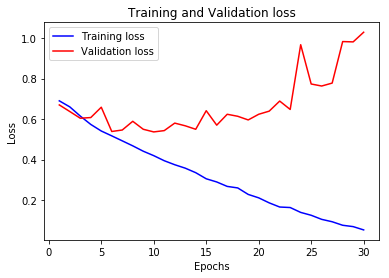

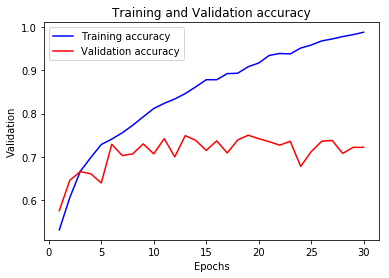

In [35]:
plot_history(history)

- These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

- Because we have relatively few training samples (2,000), overfitting will be our number-one concern. we already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.


# Data Augmentation

## Setting up a data augmentation configuration via ```ImageDataGenerator```

In [36]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

## Displaying some randomly augmented training images

In [37]:
fnames = [os.path.join(train_cats_dir, fname) for
             fname in os.listdir(train_cats_dir)]

In [38]:
img_path = fnames[3]

In [39]:
from keras.preprocessing import image

In [40]:
img = image.load_img(img_path, target_size=(150, 150))

In [41]:
x = image.img_to_array(img)

In [42]:
x.shape

(150, 150, 3)

In [43]:
x = x.reshape((1, ) + x.shape)

In [44]:
x.shape

(1, 150, 150, 3)

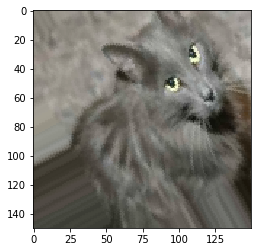

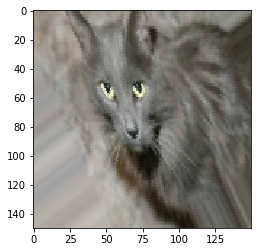

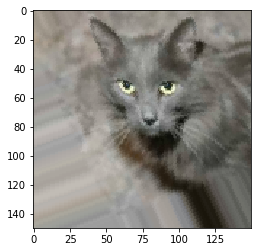

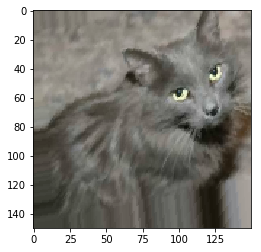

In [45]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    #plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.show()
    i += 1
    if i % 4 == 0:
        break
    


## Defining a new convnet that includes dropout

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

## Training the convnet using data-augmentation generators

In [47]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [48]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 32,
            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [51]:
%%time 
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 100,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 49s 489ms/step - loss: 0.6936 - acc: 0.5188 - val_loss: 0.6831 - val_acc: 0.5370
Epoch 2/100
100/100 [==============================] - 46s 457ms/step - loss: 0.6827 - acc: 0.5594 - val_loss: 0.6653 - val_acc: 0.6210
Epoch 3/100
100/100 [==============================] - 46s 459ms/step - loss: 0.6684 - acc: 0.6041 - val_loss: 0.6516 - val_acc: 0.6090
Epoch 4/100
100/100 [==============================] - 47s 465ms/step - loss: 0.6563 - acc: 0.6200 - val_loss: 0.6332 - val_acc: 0.6290
Epoch 5/100
100/100 [==============================] - 46s 460ms/step - loss: 0.6464 - acc: 0.6397 - val_loss: 0.6123 - val_acc: 0.6620
Epoch 6/100
100/100 [==============================] - 46s 460ms/step - loss: 0.6234 - acc: 0.6594 - val_loss: 0.5992 - val_acc: 0.6880
Epoch 7/100
100/100 [==============================] - 46s 456ms/step - loss: 0.6188 - acc: 0.6619 - val_loss: 0.5874 - val_acc: 0.6770
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 45s 454ms/step - loss: 0.4242 - acc: 0.8000 - val_loss: 0.3959 - val_acc: 0.8180
Epoch 62/100
100/100 [==============================] - 46s 458ms/step - loss: 0.4173 - acc: 0.8100 - val_loss: 0.4016 - val_acc: 0.8240
Epoch 63/100
100/100 [==============================] - 46s 455ms/step - loss: 0.4110 - acc: 0.8041 - val_loss: 0.4070 - val_acc: 0.8180
Epoch 64/100
100/100 [==============================] - 46s 456ms/step - loss: 0.4233 - acc: 0.7934 - val_loss: 0.3956 - val_acc: 0.8100
Epoch 65/100
100/100 [==============================] - 46s 456ms/step - loss: 0.4142 - acc: 0.8106 - val_loss: 0.4115 - val_acc: 0.8120
Epoch 66/100
100/100 [==============================] - 46s 455ms/step - loss: 0.4084 - acc: 0.8103 - val_loss: 0.4672 - val_acc: 0.7780
Epoch 67/100
100/100 [==============================] - 46s 455ms/step - loss: 0.4144 - acc: 0.8144 - val_loss: 0.3963 - val_acc: 0.8210
Epoch 68/100
100/100 [===================

## Saving the new model

In [52]:
model.save('cats_and_dogs_small_2.h5')

## Plot the new results

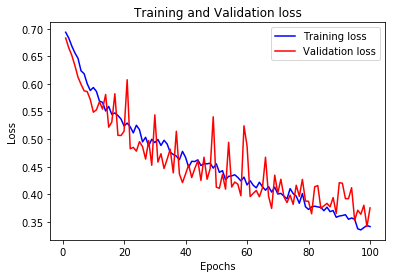

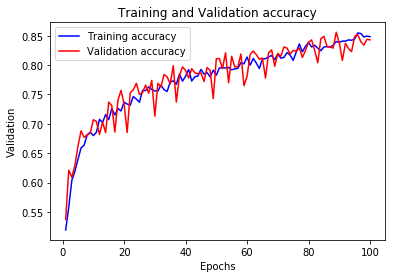

In [53]:
plot_history(history)

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are closely tracking the validation curves. 

# Using a pretrained convnet

## Insatiating the VGG16 convolutional base

In [54]:
from keras.applications import VGG16

In [55]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [56]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

The final feature map has shape ```(4, 4, 512)```. That is the feature on top of which we will stick a densely connected classifier.

## Technique 1: Fast Feature Extraction without data augmentation

We will start by running instances of the ```ImageDataGenerator``` to extract images as Numpy arrays as well as their labels. We will extract features from these images by calling the ```predict``` method of the ```conv_base``` model.

In [57]:
import os 
import numpy as np

In [58]:
base_dir

'/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/cats_and_dogs_small'

In [59]:
train_dir

'/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/cats_and_dogs_small/train'

In [60]:
validation_dir

'/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/cats_and_dogs_small/validation'

In [61]:
test_dir

'/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/cats_and_dogs_small/test'

In [62]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [63]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                directory,
                target_size=(150, 150),
                batch_size = batch_size,
                class_mode = 'binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        if i * batch_size >= sample_count:
            # Because generators yield data indefinitely in a loop, we must break after every image has been seen once.
            break
            
    return features, labels

In [64]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.


In [65]:
train_labels[:5]

array([ 0.,  1.,  0.,  1.,  0.])

In [66]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 1000 images belonging to 2 classes.


In [67]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.


The extracted features are currently of shape ```(samples, 4, 4, 512)```. We will feed them to a densely connected classifier, so first we must flatten them to ```(samples, 8192)```.

In [68]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))

In [69]:
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [70]:
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

At this point, we can define our densely connected classifier (note the use of dropout for regularization) and train it on the data and labels that we just recorded.

In [71]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [72]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [73]:
%%time
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6135 - acc: 0.6555 - val_loss: 0.4398 - val_acc: 0.8470
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4376 - acc: 0.7915 - val_loss: 0.3633 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3621 - acc: 0.8515 - val_loss: 0.3247 - val_acc: 0.8700
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3183 - acc: 0.8690 - val_loss: 0.2987 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2875 - acc: 0.8850 - val_loss: 0.2836 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2720 - acc: 0.8895 - val_loss: 0.2724 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2438 - acc: 0.9080 - val_loss: 0.2689 - val_acc: 0.8810
Epoch 8/30
200

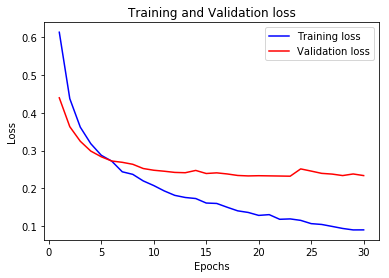

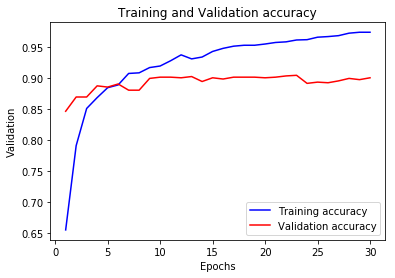

In [74]:
plot_history(history)

## Technique 2: Feature Extraction with Data Augmentation

Note: This technique is so expensive that you should only attempt it if you have access to a GPU--it is absolutely intractable on CPU.

In [75]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**NOTE**: Before we compile and train the model, it is very important to freeze the convolutional base. **Freezing** a layer or a set of layers means preventing their weights from being updated during training.

In [77]:
print('This is the number of trainable weights before freezing the conv base: ', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base:  30


In [78]:
conv_base.trainable = False

In [79]:
print('This is the number of trainable weights after freezing the conv base: ', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base:  4


### Training the model end to end with a frozen convolutional base

In [80]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [81]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [82]:
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [83]:
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [84]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [85]:
%%time
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data = validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 290s 3s/step - loss: 0.5302 - acc: 0.7270 - val_loss: 0.2307 - val_acc: 0.9080
Epoch 2/30
100/100 [==============================] - 286s 3s/step - loss: 0.3263 - acc: 0.8615 - val_loss: 0.2163 - val_acc: 0.8940
Epoch 3/30
100/100 [==============================] - 286s 3s/step - loss: 0.2245 - acc: 0.9100 - val_loss: 0.2396 - val_acc: 0.9160
Epoch 4/30
100/100 [==============================] - 286s 3s/step - loss: 0.1989 - acc: 0.9205 - val_loss: 0.1088 - val_acc: 0.9530
Epoch 5/30
100/100 [==============================] - 286s 3s/step - loss: 0.1543 - acc: 0.9385 - val_loss: 0.1353 - val_acc: 0.9460
Epoch 6/30
100/100 [==============================] - 286s 3s/step - loss: 0.1551 - acc: 0.9385 - val_loss: 0.1489 - val_acc: 0.9320
Epoch 7/30
100/100 [==============================] - 286s 3s/step - loss: 0.1311 - acc: 0.9470 - val_loss: 0.0825 - val_acc: 0.9580
Epoch 8/30
100/100 [==============================] - 286s 3s/step - 

In [86]:
model.save('cats_and_dogs_small_3.h5')

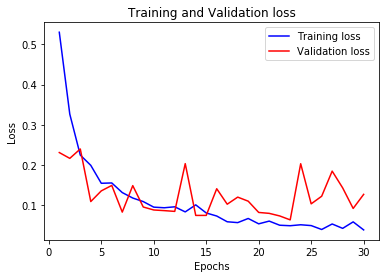

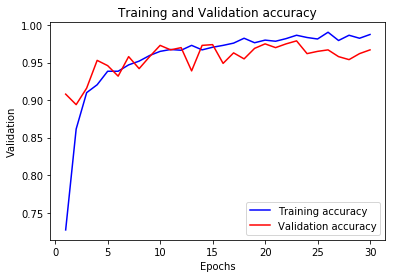

In [87]:
plot_history(history)

## Fine Tuning

Another widely used technique for model reuse, complementary to feature extraction, is fine-tuning. Fine tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers. This is callled **fine-tuning** because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.

In [88]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Freeze all layers up to a specific one

In [89]:
conv_base.trainable = True

In [90]:
set_trainable = False

In [91]:
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    
    else:
        layer.trainable = False

In [92]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data = validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 136s 1s/step - loss: 0.0293 - acc: 0.9895 - val_loss: 0.1411 - val_acc: 0.9670
Epoch 2/30
100/100 [==============================] - 141s 1s/step - loss: 0.0182 - acc: 0.9925 - val_loss: 0.1346 - val_acc: 0.9740
Epoch 3/30
100/100 [==============================] - 150s 2s/step - loss: 0.0132 - acc: 0.9945 - val_loss: 0.1579 - val_acc: 0.9710
Epoch 4/30
100/100 [==============================] - 142s 1s/step - loss: 0.0149 - acc: 0.9940 - val_loss: 0.1514 - val_acc: 0.9700
Epoch 5/30
100/100 [==============================] - 147s 1s/step - loss: 0.0194 - acc: 0.9945 - val_loss: 0.1413 - val_acc: 0.9770
Epoch 6/30
100/100 [==============================] - 153s 2s/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.1483 - val_acc: 0.9710
Epoch 7/30
100/100 [==============================] - 159s 2s/step - loss: 0.0221 - acc: 0.9935 - val_loss: 0.1416 - val_acc: 0.9700
Epoch 8/30
100/100 [==============================] - 166s 2s/step - 

In [ ]:
plot_history(history)

These curves look noisy. To make them more readable, we can smooth them by replacing every loss and accuracy with exponential moving averages of these quantities. 

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor +  point * (1 - factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points

In [ ]:
model.save('cats_dogs_small_4.h5')